# Lab 5: Data Wrangling

Often times, the information we're interested in and data we work with are complex and/or split between multiple places. A good data scientist or analyst is skilled in *data wrangling* and assembling the data however a problem requires. You will practice that skill in this lab.

Please complete this lab by providing answers in cells after the question. Use **Code** cells to write and run any code you need to answer the question and **Markdown** cells to write out answers in words. After you are finished with the assignment, remember to download it as an **.html file** and submit it in **ELMS**.

In [1]:
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots

## Reviewing Table Operations

Let's review some of the table operations we went over last week. We used methods such as `.group()` and `.pivot()` to get summaries of categorical variables. Let's take a look again at how it works using the `imdb` and `population` datasets.

In [27]:
imdb = Table.read_table('imdb.csv')
imdb.show(5)

Votes,Rating,Title,Year,Decade,Highly Rated
88355,8.4,M,1931,1930,False
132823,8.3,Singin' in the Rain,1952,1950,False
74178,8.3,All About Eve,1950,1950,False
635139,8.6,Léon,1994,1990,True
145514,8.2,The Elephant Man,1980,1980,False


In [28]:
population_amounts = Table.read_table("world_population.csv")
years = np.arange(1950, 2016)
population = population_amounts.with_columns("Year", years)
population.show(5)


Population,Year
2557628654,1950
2594939877,1951
2636772306,1952
2682053389,1953
2730228104,1954


### `group`
The table method `.group()` takes as its argument a string representing a column name. This gives the count of each category of that variable. **Remember to only use this with categorical variables, since it won't really make sense with numerical data.** Note that even if a variable has numbers, that doesn't mean it's a numerical variable. For example, we can find the number of movies that were released in each decade using `.group()` with the `Decade` variable.

In [29]:
movies_by_decade = imdb.group('Decade')
movies_by_decade

Decade,count
1920,4
1930,7
1940,14
1950,30
1960,22
1970,21
1980,31
1990,42
2000,50
2010,29


We can also use the `collect` argument to summarize other variables split up by the categories in `Decade`.

In [30]:
imdb.group('Decade', collect = np.mean)

Decade,Votes mean,Rating mean,Title mean,Year mean,Highly Rated mean
1920,64854,8.25,,1924.75,0
1930,125825,8.27143,,1935.57,0.285714
1940,122767,8.25714,,1944.07,0.142857
1950,109829,8.23333,,1955,0.133333
1960,147391,8.23182,,1964.14,0.181818
1970,353377,8.30952,,1975.62,0.285714
1980,295290,8.24194,,1984.29,0.0967742
1990,559449,8.35714,,1995.19,0.380952
2000,481929,8.26,,2004.26,0.22
2010,438006,8.2,,2012.31,0.172414


### `pivot`

You can use `.pivot()` to create contingency tables, looking at the counts for multiple categorical variables. You can also use `.pivot()` to find, for example, the mean of a third variable within each combination of categories. We'll focus on the first one for now. Let's say we want find out what the distribution of movies that got rated higher than 8.4 was by decade.

In [31]:
imdb.pivot('Highly Rated','Decade')

Decade,False,True
1920,4,0
1930,5,2
1940,12,2
1950,26,4
1960,18,4
1970,15,6
1980,28,3
1990,26,16
2000,39,11
2010,24,5


In [32]:
imdb.pivot('Highly Rated','Decade', values = 'Rating', collect = np.mean)

Decade,False,True
1920,8.25,0
1930,8.18,8.5
1940,8.20833,8.55
1950,8.16923,8.65
1960,8.14444,8.625
1970,8.12667,8.76667
1980,8.20714,8.56667
1990,8.15769,8.68125
2000,8.15641,8.62727
2010,8.125,8.56


## Joins

Sometimes, you might want to use data from multiple tables to analysis or create visualizations. We've already worked with creating Tables using existing arrays like when we added `Year` to the `population` Table. But sometimes, the rows don't quite match up exactly, so we might need to use `.join()`s to create a new Table that combines two Tables based on a common variable.

For example, let's say you wanted to know the world population in the year that each movie came out. The `imdb` table has information about movies and the year they came out in, while the `population` table has the world population for each year. We can `.join()` these two tables to combine the data.

To do this, we will use format `<table 1>.join(<table 1 column for joining>, <table 2>, <table 2 column for joining>)`.

In [33]:
movie_pop = imdb.join('Year', population, 'Year')
#movie_pop = imdb.join('Year', population, 'Year')
movie_pop.show(5)

Year,Votes,Rating,Title,Decade,Highly Rated,Population
1950,74178,8.3,All About Eve,1950,False,2557628654
1950,90434,8.3,Rashômon,1950,False,2557628654
1950,123879,8.5,Sunset Blvd.,1950,True,2557628654
1951,85012,8.1,Strangers on a Train,1950,False,2594939877
1952,132823,8.3,Singin' in the Rain,1950,False,2636772306


Note that the column for joining is the variable that is the same across the two Tables. The `.join()` method will combine all the columns from both datasets and match up the rows based on which values are the same in the variables specified in the first and third arguments.

So, in this case, we have a `Year` column in the `imdb` Table, and a `Year` column in the `population` Table. The first argument is indicating that the `Year` in the `imdb` Table should be used to match. The third argument is indicating that the `Year` in `population` should be used to match. 

### `.relabel()`

We can use `.relabel()` to change the names of columns in the Table. Let's change the name of the `Population` column that we just joined in to make it more descriptive.

In [34]:
movie_population = movie_pop.relabel('Population', 'World Pop. When Movie Was Released')
movie_population.show(5)

Year,Votes,Rating,Title,Decade,Highly Rated,World Pop. When Movie Was Released
1950,74178,8.3,All About Eve,1950,False,2557628654
1950,90434,8.3,Rashômon,1950,False,2557628654
1950,123879,8.5,Sunset Blvd.,1950,True,2557628654
1951,85012,8.1,Strangers on a Train,1950,False,2594939877
1952,132823,8.3,Singin' in the Rain,1950,False,2636772306


<font color = 'red'>**Question 1. What if we wanted to know the world population at the start of the decade that the movie came out in? Make a new Table by adding a column to `movie_population` that contains the population at the start of that decade. Change the name of that column to `Population at Start of Decade`. Call the new table `movie_population_with_decade`.**</font>

*Hint:* Think about what variables there are already within the `movie_population` Table. 

In [36]:
movie_pop_with_decade = movie_population.join('Decade', population, 'Year')
movie_population_with_decade = movie_pop_with_decade.relabel('Population', 'Population at Start of Decade')
movie_population_with_decade.show(5)


Decade,Year,Votes,Rating,Title,Highly Rated,World Pop. When Movie Was Released,Population at Start of Decade
1950,1950,74178,8.3,All About Eve,False,2557628654,2557628654
1950,1950,90434,8.3,Rashômon,False,2557628654,2557628654
1950,1950,123879,8.5,Sunset Blvd.,True,2557628654,2557628654
1950,1951,85012,8.1,Strangers on a Train,False,2594939877,2557628654
1950,1952,132823,8.3,Singin' in the Rain,False,2636772306,2557628654


## Global Population


The global population of humans reached 1 billion around 1800, 3 billion around 1960, and 7 billion around 2011. The potential impact of exponential population growth has concerned scientists, economists, and politicians alike.

The UN Population Division estimates that the world population will likely continue to grow throughout the 21st century, but at a slower rate, perhaps reaching 11 billion by 2100. However, the UN does not rule out scenarios of more extreme growth.

<a href="http://www.pewresearch.org/fact-tank/2015/06/08/scientists-more-worried-than-public-about-worlds-growing-population/ft_15-06-04_popcount/"> 
 <img src="pew_population_projection.png"/> 
</a>

In this lab, you'll explore data from [Gapminder.org](https://www.gapminder.org), a website dedicated to providing a fact-based view of the world and how it has changed. That site includes several data visualizations and presentations, but also publishes the raw data that we will use in this project to recreate and extend some of their most famous visualizations.

The Gapminder website collects data from many sources and compiles them into tables that describe many countries around the world. All of the data they aggregate are published in the Systema Globalis. Their goal is "to compile all public statistics; Social, Economic and Environmental; into a comparable total dataset." All data sets in this lab are copied directly from the Systema Globalis without any changes.

The first table we will consider is the total population of each country over time. Run the cell below.

In [37]:
global_population = Table.read_table('population.csv')
global_population.show(3)

geo,time,population_total
abw,1800,19286
abw,1801,19286
abw,1802,19286


The `population.csv` file has figures for the population for each country by year, including projections going up to the year 2100. The `geo` column contains three-letter country codes established by the  [International Organization for Standardization](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard. The `time` column contains the year, and the `population_total` column contains the population for that country and year. 

The `country_regions.csv` file contains a list of countries with their Alpha-3 code and the region that the country is in. 

In [45]:
regions = Table.read_table('country_regions.csv')
regions.show(5)

country,alpha-3,region
Afghanistan,afg,Asia
Åland Islands,ala,Europe
Albania,alb,Europe
Algeria,dza,Africa
American Samoa,asm,Oceania


We'll only be looking at a short period of time from 1970 to 2015 for this lab, so let's start by subsetting our data to only contain population figures for those years.

In [46]:
pop_1970_2015 = global_population.where('time', are.between(1970,2016)); pop_1970_2015

geo,time,population_total
abw,1970,59065
abw,1971,59438
abw,1972,59849
abw,1973,60239
abw,1974,60525
abw,1975,60655
abw,1976,60589
abw,1977,60366
abw,1978,60106
abw,1979,59978


<font color = 'red'>**Question 2. Make a new Table called `population_with_regions` that contains information about each country's population by year as well as the region that country is in. Do this by taking the `pop_1970_2015` Table and joining in the data in the `regions` Table.**</font>

In [47]:
population_with_regions = pop_1970_2015.join('geo', regions, 'alpha-3')
population_with_regions.show(5)

geo,time,population_total,country,region
abw,1970,59065,Aruba,Americas
abw,1971,59438,Aruba,Americas
abw,1972,59849,Aruba,Americas
abw,1973,60239,Aruba,Americas
abw,1974,60525,Aruba,Americas


<font color = 'red'>**Question 3. Next, create a new Table that has one column for the year and has region as the other columns, with the total population of each region for each year as the values within the Table. Call this table `region_pop_over_years`.**</font>

In other words, your Table should look something like this:

|time|Africa|Americas|Asia|Europe|Oceania|
|-|-|-|-|-|-|
|1970|365625954|519361726|2120468918|657135156|19691363|
|1971|375133749|528840584|2172148431|661288916|20094495|
|...|...|...|...|...|...|


In [48]:
region_pop_over_years = population_with_regions.pivot('region', 'time', values = 'population_total', collect = sum)
region_pop_over_years.show(10)


time,Africa,Americas,Asia,Europe,Oceania
1970,365625954,519361726,2120468918,657135156,19691363
1971,375133749,528840584,2172148431,661288916,20094495
1972,384921127,538427931,2224115058,665426251,20476742
1973,395036843,548127832,2276000452,669504566,20837703
1974,405544110,557937958,2327412312,673454270,21178650
1975,416490480,567856042,2378107458,677226164,21501739
1976,427894792,577888228,2427915296,680816501,21804879
1977,439752826,588037992,2476953215,684249973,22090391
1978,452059713,598295610,2525747010,687539498,22370598
1979,464801159,608646603,2575089217,690705591,22661895


<font color = 'red'>**Question 4. Create a line graph that has the year on the x-axis, the total population on the y-axis, and a separate line for each region. What can you say about the population trends of the different regions of the world within this time span based on this graph?**</font>

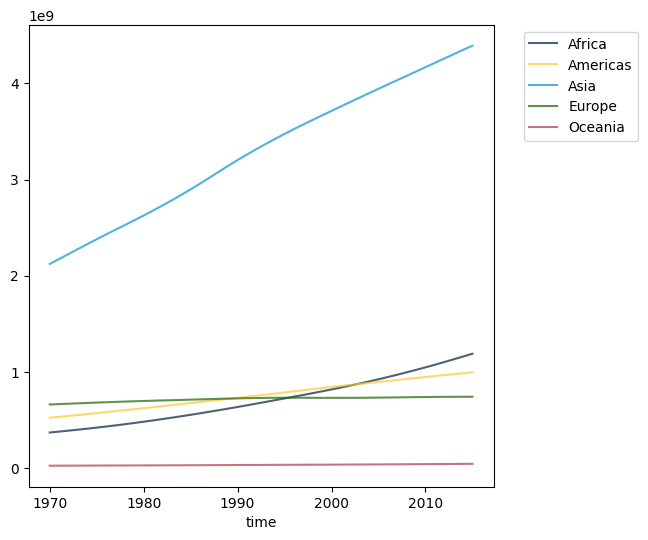

In [52]:
population_with_regions.pivot('region', 'time', 'population_total', np.sum).plot('time')
# region_pop_over_years.plot('time')



### Bangladesh

As mentioned above, in the `population` table, the `geo` column contains three-letter codes established by the International Organization for Standardization (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard. We will begin by taking a close look at Bangladesh. Find Bangladesh by inspecting the standard or using the `regions` Table.

In [29]:
regions.where('country', are.equal_to('Bangladesh'))

country,alpha-3,region
Bangladesh,bgd,Asia


<font color = 'red'>**Question 5. Create a table called `b_pop` that has two columns labeled `time` and `population_total`. The first column should contain the years from 1970 through 2015 (including both 1970 and 2015) and the second should contain the population of Bangladesh in each of those years.**

In [31]:
b_pop = pop_1970_2015.where('geo', are.equal_to('bgd'))
b_pop.show(5)

geo,time,population_total
bgd,1970,65048701
bgd,1971,66417450
bgd,1972,67578486
bgd,1973,68658472
bgd,1974,69837960


Although the population has generally grown since 1970 and it might be hard to tell based on the numbers alone, the annual growth rate decreased dramatically from 1985 to 2005. Let's look at some other information in order to develop a possible explanation. Run the next cell to load three additional tables of measurements about countries over time.

In [53]:
life_expectancy = Table.read_table('life_expectancy.csv')
child_mortality = Table.read_table('child_mortality.csv').relabel(2, 'Child Mortality per 1000')
fertility = Table.read_table('fertility.csv').relabel(2, 'Children per Woman')

In [54]:
life_expectancy.show(5)

geo,time,life_expectancy_years
afg,1800,28.21
afg,1801,28.2
afg,1802,28.19
afg,1803,28.18
afg,1804,28.17


In [25]:
child_mortality.show(5)

geo,time,Child Mortality per 1000
afg,1800,468.6
afg,1801,468.6
afg,1802,468.6
afg,1803,468.6
afg,1804,468.6


In [55]:
fertility.show(5)

geo,time,Children per Woman
afg,1800,7
afg,1801,7
afg,1802,7
afg,1803,7
afg,1804,7


### Life Expectancy

The `life_expectancy` table contains a statistic that is often used to measure how long people live, called *life expectancy at birth*. This number, for a country in a given year, [does not measure how long babies born in that year are expected to live](http://blogs.worldbank.org/opendata/what-does-life-expectancy-birth-really-mean). Instead, it measures how long someone would live, on average, if the *mortality conditions* in that year persisted throughout their lifetime. These "mortality conditions" describe what fraction of people at each age survived the year. So, it is a way of measuring the proportion of people that are staying alive, aggregated over different age groups in the population.

Perhaps population is growing more slowly because people aren't living as long. Let's use the `life_expectancy` Table to try to determine if this is the case. 

<font color = 'red'>**Question 6. Use the `life_expectancy` Table to draw a line graph with the years 1970 and later on the horizontal axis that shows how the life expectancy at birth has changed in Bangladesh.**

*Hint:* First, create a Table that has the life expectancy for Bangladesh from 1970 to 2015 with `time` and `life_expectancy_years` as the columns.

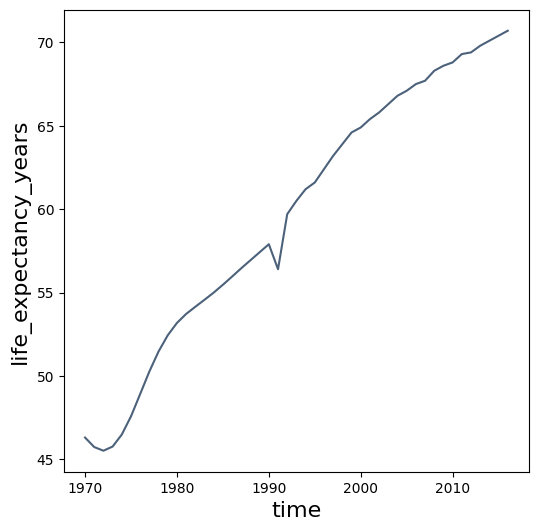

In [27]:
b_life_expectancy = life_expectancy.where('geo', are.equal_to('bgd'))
b_life_expectancy_from_1970 = b_life_expectancy.where('time', are.between_or_equal_to(1970,2016))
b_life_expectancy_from_1970.select('time','life_expectancy_years').plot('time')

<font color = 'red'>**Question 7. Assuming everything else stays the same, does the graph above help directly explain why the population growth rate decreased from 1985 to 2010 in Bangladesh? Why or why not? What happened in Bangladesh in 1991, and does that event explain the change in population growth rate?**

Yes, there seems to be a part where the life expectancy suddenly went down in 1991. This was due to the [Bangladesh cyclone in 1991](https://en.wikipedia.org/wiki/1991_Bangladesh_cyclone) which killed an estimated 138,000 people. 




### Fertility and Child Mortality

The `fertility` table contains a statistic that is often used to measure how many babies are being born, the *total fertility rate*. This number describes the [number of children a woman would have in her lifetime](https://www.measureevaluation.org/prh/rh_indicators/specific/fertility/total-fertility-rate), on average, if the current rates of birth by age of the mother persisted throughout her child bearing years, assuming she survived through age 49. 

It has been observed that lower fertility rates are often associated with lower child mortality rates. The link has been attributed to family planning: if parents can expect that their children will all survive into adulthood, then they will choose to have fewer children. We can see if this association is evident in Bangladesh by plotting the relationship between total fertility rate and [child mortality rate per 1000 children](https://en.wikipedia.org/wiki/Child_mortality).

<font color = 'red'>**Question 8. Using both the `fertility` and `child_mortality` Tables, draw a scatter diagram with one point for each year, starting with 1970, that has Bangladesh's total fertility on the horizontal axis and its child mortality on the vertical axis.**

*Hint:* First, create a Table for Bangladesh's fertility from 1970 on, as well as a Table for Bangladesh's child mortality from 1970 on. Then, join the two tables together. Use the joined Table and `.scatter()` to graph the two together.

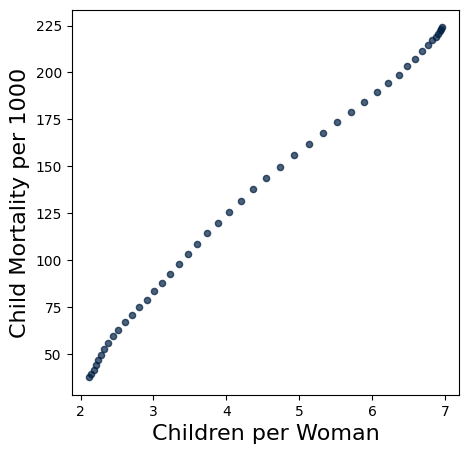

In [28]:
# You will need to use where twice to get b_fertility and b_child_mortality.
# First, b_fertility from 1970
b_fertility = fertility.where('geo', are.equal_to('bgd'))
b_fertility_from_1970 = b_fertility.where('time', are.between_or_equal_to(1970,2015))

# Then, b_mortality from 1970
b_child_mortality = child_mortality.where('geo', are.equal_to('bgd'))
b_child_mortality_from_1970 = b_child_mortality.where('time', are.between_or_equal_to(1970,2015))

# Now, join the two together
b_fertility_child_mortality = b_fertility_from_1970.join('time', b_child_mortality_from_1970, 'time')

# Graph using scatter
b_fertility_child_mortality.scatter('Children per Woman', 'Child Mortality per 1000')

<font color = 'red'>**Question 9. In one or two sentences, describe the association (if any) that is illustrated by this scatter diagram. Does the diagram show that reduced child mortality causes parents to choose to have fewer children?**

There seems to be a very strong association between child mortality and fertility. Higher fertility is associated with higher child mortality, and vice versa.


That's all for now. Please let us know if you have trouble understanding anything covered in this module, as we will only continue to build on this material in the coming weeks.